# Matplotlib で　図表を作成する

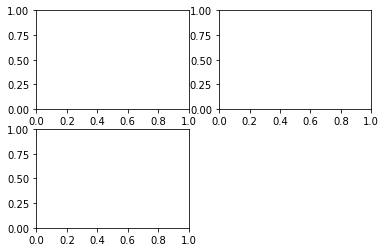

In [2]:
import matplotlib.pyplot as plt

fig=plt.figure()

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)

### subplots()関数を利用してサブプロットを配置する

<class 'numpy.ndarray'>
<class 'matplotlib.figure.Figure'>


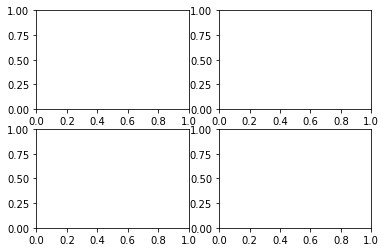

In [3]:
fig,axes = plt.subplots(2,2)

print(type(axes))
print(type(fig))
plt.show()

### スタイルの適用 ggplotスタイルを適用する

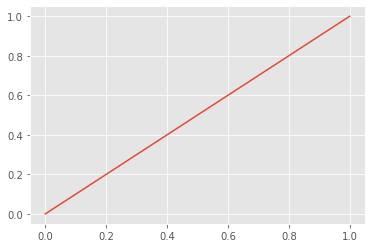

In [4]:
plt.style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot(111)

dat=[0,1]
ax.plot(dat)

plt.show()

# １．折れ線グラフの作成

#### plotメソッドの引数は、リスト、Seriesデータ、配列データが、可能

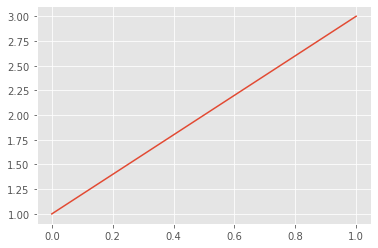

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot([1,3])

plt.show()

In [6]:
import pandas as pd

ser=pd.Series([0,1])
print(ser)

fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(ser)

plt.show()

ImportError: cannot import name 'assert_extension_array_equal'

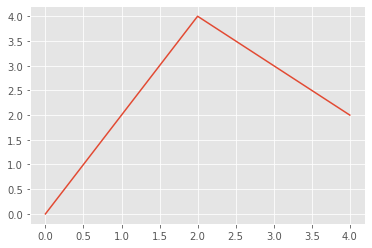

In [6]:
fig=plt.figure()
ax=fig.add_subplot(111)

x=[0,2,4]
y=[0,4,2]

ax.plot(x,y)
plt.show()

#### plotメソッドの引数としては、X変数、Y変数のふたつを選択できる。Seriesデータを引数にできる。





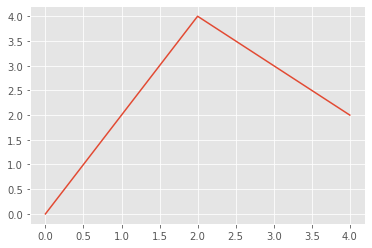

In [7]:
import pandas as pd

fig=plt.figure()
ax=fig.add_subplot(111)

x=pd.Series([0,2,4])
y=pd.Series([0,4,2])

ax.plot(x,y)
plt.show()

#### 複数の折れ線グラフを描画する

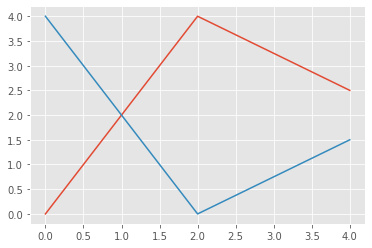

In [8]:
import pandas as pd

fig=plt.figure()
ax=fig.add_subplot(111)

x=pd.Series([0,2,4])
y1=pd.Series([0,4,2.5])
y2=pd.Series([4,0,1.5])

#  axというオブジェクトに対して、plot(x,y1)とplot(x,y2)のふたつのメソッドを付加する
ax.plot(x,y1)
ax.plot(x,y2)

plt.show()

#### データを読み込んで, DataFrameにして、それを描画する

In [9]:
import os
import pandas as pd

base_url='C:/Users/kohsuke maeda/TextBook-Jupyter-practical-introduction/anime'
anime_stock_returns=os.path.join(base_url,'anime_stock_returns.csv')

print()

df=pd.read_csv(anime_stock_returns,index_col=0,parse_dates=['Date'])
df.head()

,TOEI ANIMATION,IG Port
Date,,
2015-01-01,1.000000,1.000000
2015-01-02,1.000000,1.000000
2015-01-05,1.011695,1.014082
2015-01-06,1.001463,1.000000
2015-01-07,0.982457,1.000824


In [10]:
print(type(df['IG Port']))
print(type(df['TOEI ANIMATION']))
print(df.index)


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=522, freq=None)


#### df.indexは、Datetime型データ 

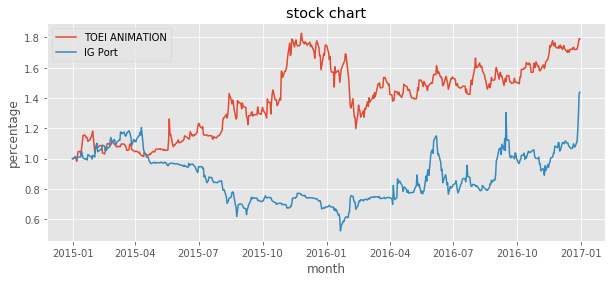

In [11]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,4))
ax=fig.add_subplot(111)

ax.plot(df.index,df['TOEI ANIMATION'],label='TOEI ANIMATION')
ax.plot(df.index,df['IG Port'],label='IG Port')

ax.set_title('stock chart')
ax.set_ylabel('percentage')
ax.set_xlabel('month')

ax.legend()

plt.show()

# ２．散布図の作成

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


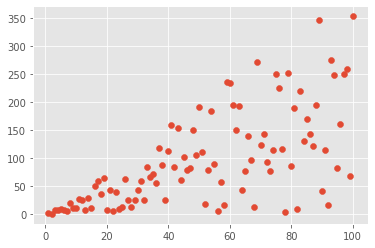

In [12]:
import numpy as np

np.random.seed(2)

x=np.arange(1,101)
y=4*x*np.random.rand(100)

print(type(x))
print(type(y))

fig=plt.figure()
ax=fig.add_subplot(111)

# 配列データを引数とする
ax.scatter(x,y)

plt.show()

#### Seriesデータを引数として、散布図を作成

##### csvファイルの読み込み

In [13]:
import os
import pandas as pd

base_url='C:/Users/kohsuke maeda/TextBook-Jupyter-practical-introduction/anime'
anime_master=os.path.join(base_url,'anime_master.csv')


df=pd.read_csv(anime_master,index_col='anime_id')
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


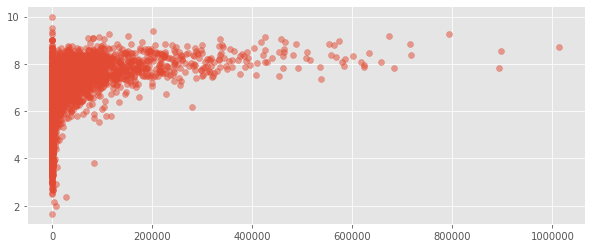

In [14]:
fig=plt.figure(figsize=(10,4))
ax=fig.add_subplot(111)

# Seriesデータを引数とする
ax.scatter(df['members'],df['rating'],alpha=0.5)
plt.show()

## 2-1.  グループ別の散布図を作成

#### DataFrameから、データを一部抽出

In [15]:
df.loc[df['members']>=800000,['name','members']]



,name,members
anime_id,,
1535,Death Note,1013917
16498,Shingeki no Kyojin,896229
11757,Sword Art Online,893100


In [16]:
df.loc[(df['members']>=600000)&(df['rating']>=8.5),['name','rating']]

,name,rating
anime_id,,
5114,Fullmetal Alchemist: Brotherhood,9.26
9253,Steins;Gate,9.17
1575,Code Geass: Hangyaku no Lelouch,8.83
1535,Death Note,8.71
16498,Shingeki no Kyojin,8.54


In [17]:
types =df['type'].unique()
types

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA']
anime_id
32281    False
5114     False
28977    False
9253     False
9969     False
32935    False
11061    False
820       True
15335    False
15417    False
4181     False
28851    False
918      False
2904     False
28891    False
199      False
23273    False
24701    False
12355    False
1575     False
263      False
44        True
1        False
30276    False
164      False
7311     False
17074    False
21939    False
457      False
2001     False
         ...  
31838    False
33048    False
30211    False
5821     False
4790     False
33571    False
33570    False
9520     False
9522     False
23313    False
10987    False
22709    False
23315    False
31698    False
33339    False
11093    False
31427    False
32733    False
19717     True
12759     True
32557    False
30089     True
30090    False
13167    False
11097    False
11095    False
7808     False
28543     True
18967     True
13455    False
Name: type, Length: 10075, dtyp

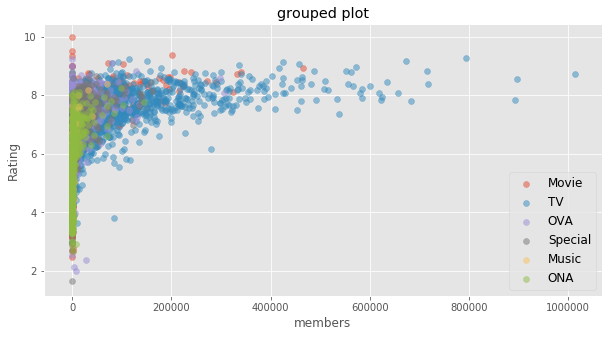

In [18]:
df=pd.read_csv(anime_master,index_col='anime_id')

fig = plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)

types =df['type'].unique()
print(types)
print(df['type']=='OVA')

for t in types:
    x=df.loc[df['type']==t, 'members']
    y=df.loc[df['type']==t, 'rating']
    ax.scatter(x,y,alpha=0.5, label=t)
    ax.set_title('grouped plot')
    ax.set_xlabel('members')
    ax.set_ylabel('Rating')
    ax.legend(loc='lower right', fontsize=12)
    
plt.show()

# 3 棒グラフ

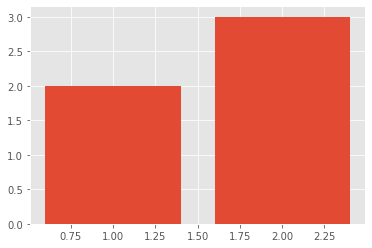

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111)

x=[1,2]
y=[2,3]

ax.bar(x,y)

plt.show()

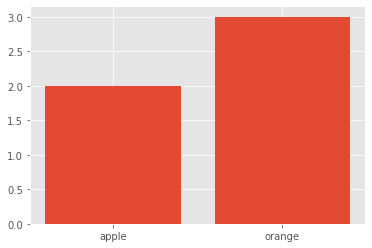

In [20]:
fig=plt.figure()
ax=fig.add_subplot(111)

x=[1,2]
y=[2,3]

labels=['apple','orange']

ax.bar(x,y,tick_label=labels)

plt.show()

## 3-2. 横向きの棒グラフ

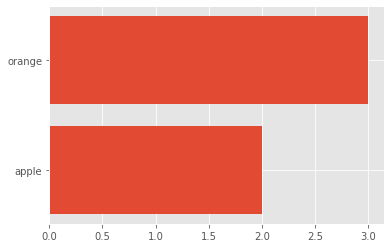

In [21]:
fig=plt.figure()
ax=fig.add_subplot(111)

ax.barh(x,y,tick_label=labels)

plt.show()

## 3-3. グループ別の棒グラフ

#### Seriesデータ、配列データを引数として、棒グラフを作成

<class 'range'>
<class 'pandas.core.series.Series'>


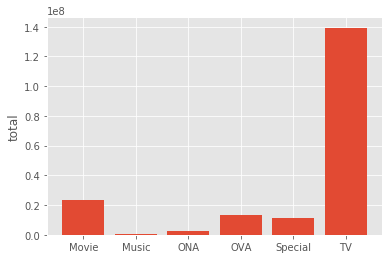

In [22]:
import os
import pandas as pd

base_url='C:/Users/kohsuke maeda/TextBook-Jupyter-practical-introduction/anime'
anime_master=os.path.join(base_url,'anime_master.csv')

df=pd.read_csv(anime_master)

fig=plt.figure()
ax=fig.add_subplot(111)

y=df.groupby('type').sum()['members']
x=range(len(y))

#x :配列データ
#y :Seriesデータ

xlabels=y.index

print(type(x))
print(type(y))

ax.bar(x,y,tick_label=xlabels)
ax.set_ylabel('total')

plt.show()

## 3-4. ラベル付きの複数グループ別の棒グラフ

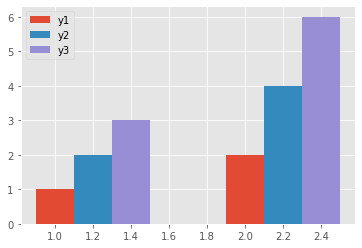

In [23]:
import numpy as np

x=[1,2]
y1,y2,y3 = [1,2],[2,4],[3,6]

fig=plt.figure()
ax=fig.add_subplot(111)

w=0.2
ax.bar(x,y1,width=w, label='y1')
ax.bar(np.array(x)+w, y2, width=w, label='y2')
ax.bar(np.array(x)+w*2,y3,width=w,label='y3')

ax.legend()

plt.show()

####   ラベル付き複数グループの棒グラフの実例 

In [24]:
import os
import pandas as pd

base_url='C:/Users/kohsuke maeda/TextBook-Jupyter-practical-introduction/anime'
anime_genre_top10=os.path.join(base_url,'anime_genre_top10_pivoted.csv')


df=pd.read_csv(anime_genre_top10,index_col='genre')
print(df.head())
print(df.shape)

                   Movie     Music        ONA        OVA    Special  \
genre                                                                 
Comedy         7293127.0   20860.0  1477266.0  5614758.0  6659293.0   
Action        10224960.0   77054.0   524907.0  5793680.0  3412689.0   
Drama          9034099.0  100734.0   188427.0  3043374.0  1915578.0   
Romance        5245386.0   42811.0   411331.0  3143167.0  2015820.0   
Supernatural   5452779.0    9189.0   192989.0  2696715.0  2336723.0   

                      TV  
genre                     
Comedy        65420862.0  
Action        63364032.0  
Drama         41011557.0  
Romance       40703388.0  
Supernatural  38956520.0  
(10, 6)


####  y軸を対数軸とする

10
Index(['Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV'], dtype='object')
[0 1 2 3 4 5 6 7 8 9]


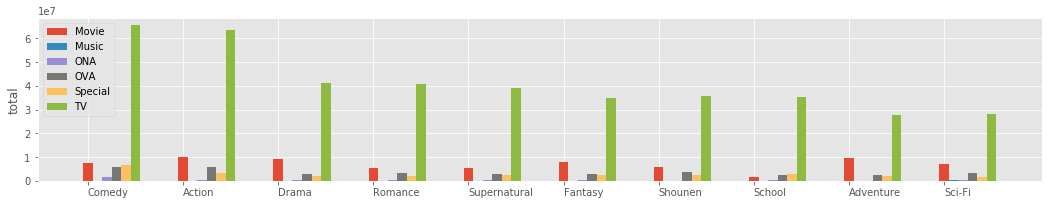

In [25]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(18,3))
ax=fig.add_subplot(111)

print(len(df))
print(df.columns)

wt=np.array(range(len(df)))
w=0.1
print(wt)

for i in df.columns:
    ax.bar(wt,df[i],width=w,label=i)
    wt=wt+w
    ax.set_xticks(np.array(range(len(df))))
    ax.set_xticklabels(df.index,ha='left')
    ax.set_ylabel('total')
    ax.legend()
    
plt.show()

10
Index(['Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV'], dtype='object')
[0 1 2 3 4 5 6 7 8 9]


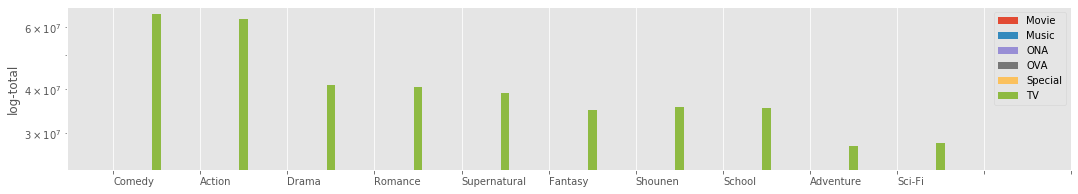

In [26]:
fig = plt.figure(figsize=(18,3))
ax=fig.add_subplot(111)

print(len(df))
print(df.columns)

wt=np.array(range(len(df)))
w=0.1
print(wt)

for i in df.columns:
    ax.bar(wt,df[i],width=w,label=i)
    wt=wt+w
    ax.set_xticks(np.array(range(len(df)+2)))
    ax.set_xticklabels(df.index,ha='left')
    ax.set_ylabel('log-total')
    ax.set_yscale('log')
    ax.legend()
    
plt.show()

## 3-5.  積み上げ棒グラフ

[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]]
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
[0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]


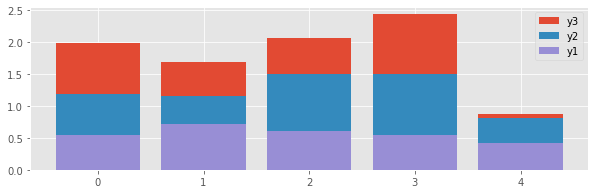

In [27]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

x=np.arange(5)
y=np.random.rand(15).reshape((3,5))
# y は、（３，５）行列

print(y)

#y1, y2, y3は、（１，５）ベクトル
y1,y2,y3 = y

print(np.array(y1))
print(np.array(y2))
print(np.array(y3))

y1b = np.array(y1)
y2b = y1b+np.array(y2)
y3b = y2b+np.array(y3) 

fig=plt.figure(figsize=(10,3))
ax=fig.add_subplot(111)

ax.bar(x,y3b,label='y3')
ax.bar(x,y2b,label='y2')
ax.bar(x,y1b,label='y1')

ax.legend()

plt.show()

# ４．ヒストグラム

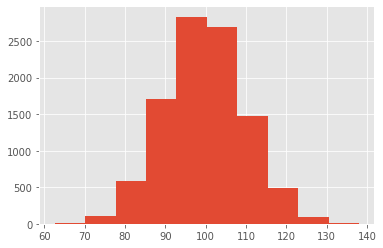

In [28]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

mu=100
sigma=10
np.random.seed(0)

x=np.random.normal(mu,sigma,10000)

fig=plt.figure()
ax=fig.add_subplot(111)

ax.hist(x)

plt.show()

#### ビンの数を変更する

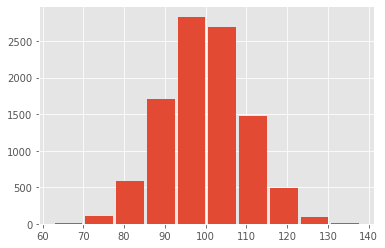

In [29]:
fig=plt.figure()

ax=fig.add_subplot(111)
ax.hist(x,rwidth=0.9,bins=10)

plt.show()

#### binsを10から20に変更するとヒストグラムが細かくなる

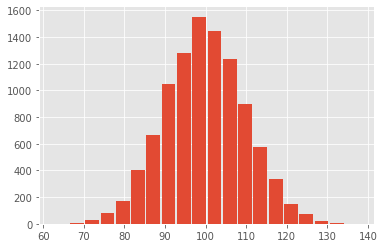

In [30]:
fig=plt.figure()

ax=fig.add_subplot(111)
ax.hist(x,rwidth=0.9,bins=20)

plt.show()

## 4-1. ヒストグラムの実例

In [31]:
import os
import pandas as pd

base_url='C:/Users/kohsuke maeda/TextBook-Jupyter-practical-introduction/anime'
anime_master=os.path.join(base_url,'anime_master.csv')

df=pd.read_csv(anime_master)
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


#### Seriesデータを引数として、ヒストグラムを作成する

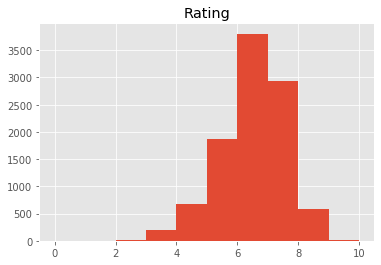

In [32]:
fig=plt.figure()

ax=fig.add_subplot(111)


ax.hist(df['rating'],rwidth=1, range=(0,10))
ax.set_title('Rating')

plt.show()

#### rwidthを１から、0.5に変更するとビンの幅が小さくなる

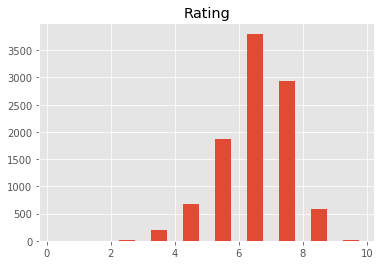

In [33]:
fig=plt.figure()

ax=fig.add_subplot(111)


ax.hist(df['rating'],rwidth=0.5, range=(0,10))
ax.set_title('Rating')

plt.show()

#### rangeを（０，１０）を（０，２０）に変更するとX軸の範囲が広くなる

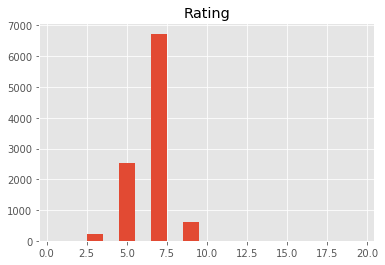

In [34]:
fig=plt.figure()

ax=fig.add_subplot(111)


ax.hist(df['rating'],rwidth=0.5, range=(0,20))
ax.set_title('Rating')

plt.show()

# 5. 箱ひげ図

#### list of list を引数とする場合

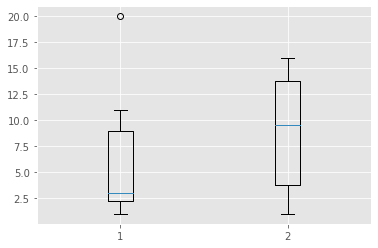

In [35]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

# list of list
x=[[1,2,3,3,11,20],[1,2,9,10,15,16]]

fig=plt.figure()

ax=fig.add_subplot(111)
ax.boxplot(x)

plt.show()

#### DataFrameを引数とする場合

In [36]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

# list of list
x=[[1,2,3,3,11,20],[1,2,9,10,15,16]]
df=pd.DataFrame(x)

print(df.head())
print(df.shape)

   0  1  2   3   4   5
0  1  2  3   3  11  20
1  1  2  9  10  15  16
(2, 6)


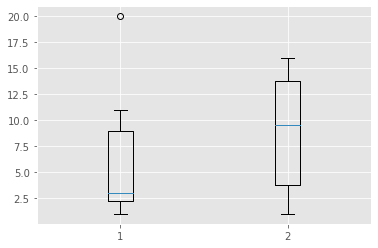

In [37]:
fig=plt.figure()

ax=fig.add_subplot(111)
ax.boxplot(df)

plt.show()

## 5-1. 箱ひげ図の実例

In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

base_url='C:/Users/kohsuke maeda/TextBook-Jupyter-practical-introduction/anime'
anime_master=os.path.join(base_url,'anime_master.csv')

df=pd.read_csv(anime_master)
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


#### list of listを引数として箱ひげ図を作成する

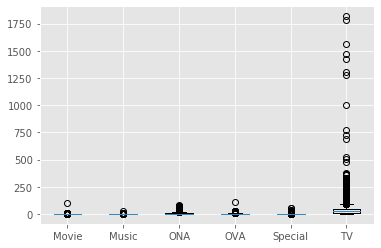

In [39]:
labels=[]
types_list=[]

for label,df_per_type in df.groupby('type'):
    labels.append(label)
    types_list.append(df_per_type['episodes'].tolist())

type(df_per_type['episodes'])
# Seriesデータ

fig=plt.figure()
ax=fig.add_subplot(111)

ax.boxplot(types_list,labels=labels)

plt.show()
    

In [40]:
type(types_list)


list